In [310]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [311]:
# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [312]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [313]:
# Change name format to have underscore
sales.rename(columns={
    "Invoice ID": "INVOICE_ID",
    "Customer type": "CUSTOMER_TYPE",
    "Product line": "PRODUCT_LINE",
    "Unit price": "UNIT_PRICE",
    "Tax 5%": "TAX_5%",
    "gross margin percentage": "GROSS_MARGIN_PERCENTAGE",
    "gross income": "GROSS_INCOME"
}, inplace=True)

sales = sales.rename(columns=str.upper)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INVOICE_ID               1000 non-null   object 
 1   BRANCH                   1000 non-null   object 
 2   CITY                     1000 non-null   object 
 3   CUSTOMER_TYPE            1000 non-null   object 
 4   GENDER                   1000 non-null   object 
 5   PRODUCT_LINE             1000 non-null   object 
 6   UNIT_PRICE               1000 non-null   float64
 7   QUANTITY                 1000 non-null   int64  
 8   TAX_5%                   1000 non-null   float64
 9   TOTAL                    1000 non-null   float64
 10  DATE                     1000 non-null   object 
 11  TIME                     1000 non-null   object 
 12  PAYMENT                  1000 non-null   object 
 13  COGS                     1000 non-null   float64
 14  GROSS_MARGIN_PERCENTAGE  

In [314]:
sales.describe()  # Summarize in statistical parameter

,UNIT_PRICE,QUANTITY,TAX_5%,TOTAL,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [315]:
sales.isnull().sum() # Check null values

INVOICE_ID                 0
BRANCH                     0
CITY                       0
CUSTOMER_TYPE              0
GENDER                     0
PRODUCT_LINE               0
UNIT_PRICE                 0
QUANTITY                   0
TAX_5%                     0
TOTAL                      0
DATE                       0
TIME                       0
PAYMENT                    0
COGS                       0
GROSS_MARGIN_PERCENTAGE    0
GROSS_INCOME               0
RATING                     0
dtype: int64

In [316]:
avg_unit_price = sales["UNIT_PRICE"].astype("float").mean(axis=0)
sales["UNIT_PRICE"].replace(np.nan, avg_unit_price, inplace=True)

In [317]:
from scipy import stats
mode = stats.mode(sales["QUANTITY"])

print(mode)

ModeResult(mode=10, count=119)


In [318]:
sales['QUANTITY'].replace(np.nan, "mode", inplace=True)

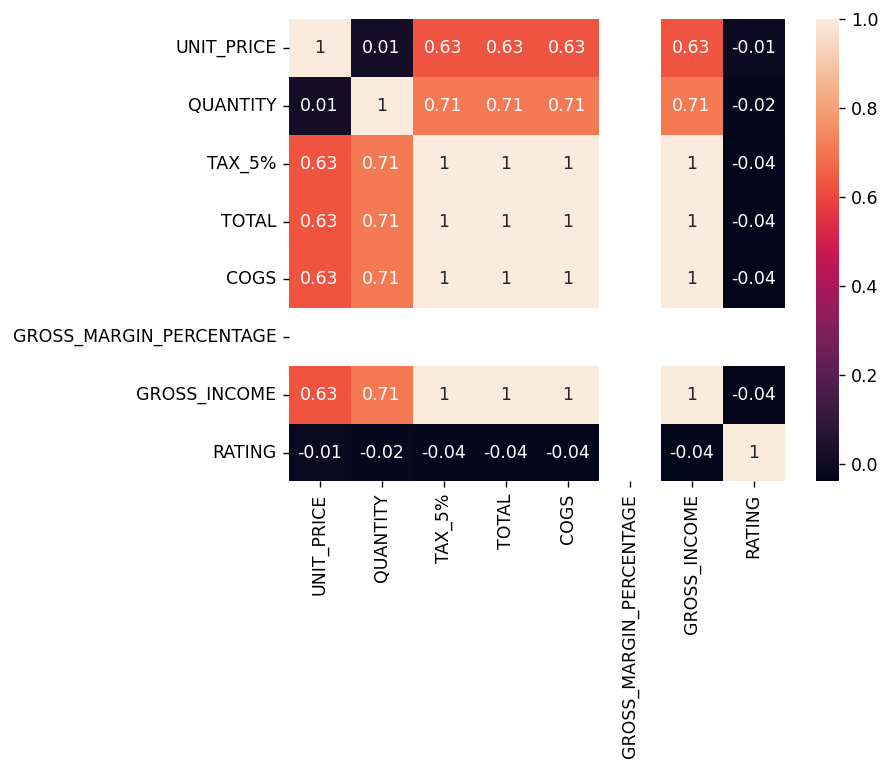

In [319]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.select_dtypes(exclude=['object']).corr(), 2),annot=True)
plt.show()

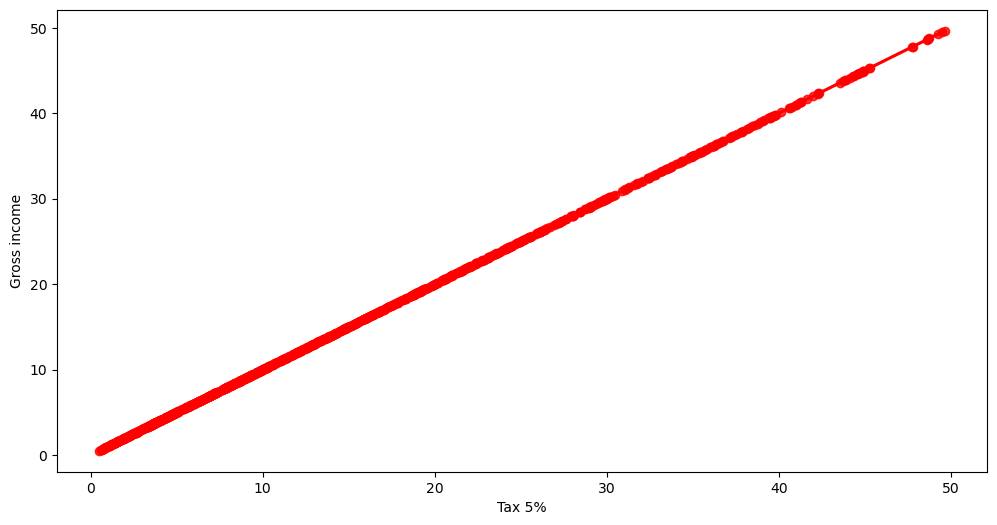

In [320]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='TAX_5%',y='GROSS_INCOME',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross income')
plt.show()

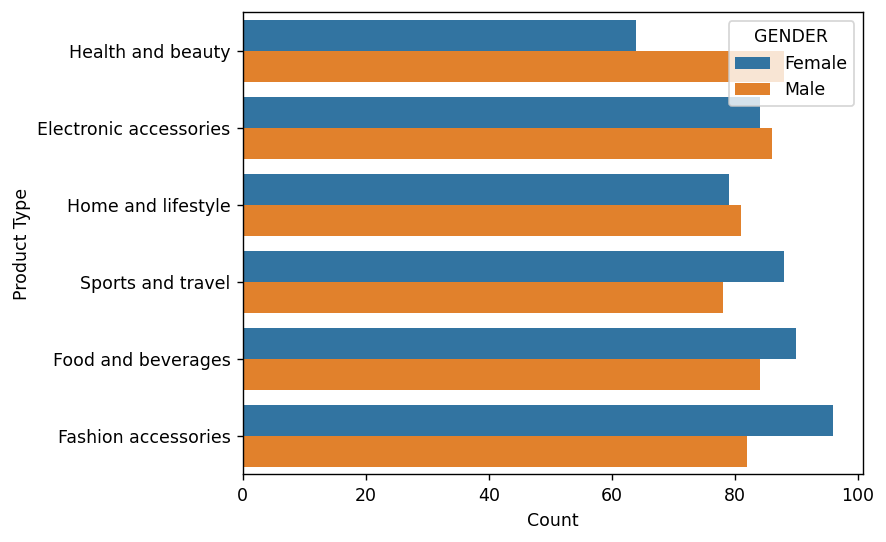

In [321]:
plt.figure(dpi=125)
sns.countplot(y ="PRODUCT_LINE", hue = "GENDER", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

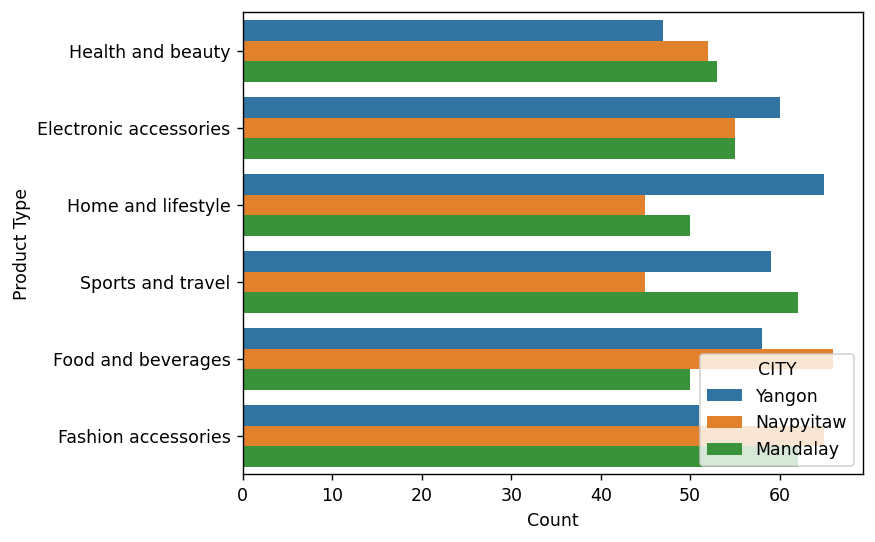

In [322]:
plt.figure(dpi=125)
sns.countplot(y ='PRODUCT_LINE', hue = "CITY", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

In [323]:
pd.options.display.max_columns=100 # limit display columns to 100

In [324]:
categorical_col = [c for c in sales.columns if sales[c].dtypes == "object"]

In [325]:
categorical_col

['INVOICE_ID',
 'BRANCH',
 'CITY',
 'CUSTOMER_TYPE',
 'GENDER',
 'PRODUCT_LINE',
 'DATE',
 'TIME',
 'PAYMENT']

In [326]:
cat_feature = sales.select_dtypes(include=["object"])

In [327]:
cat_feature.describe()

,INVOICE_ID,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,DATE,TIME,PAYMENT
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


Text(0.5, 1.0, 'Gender count')

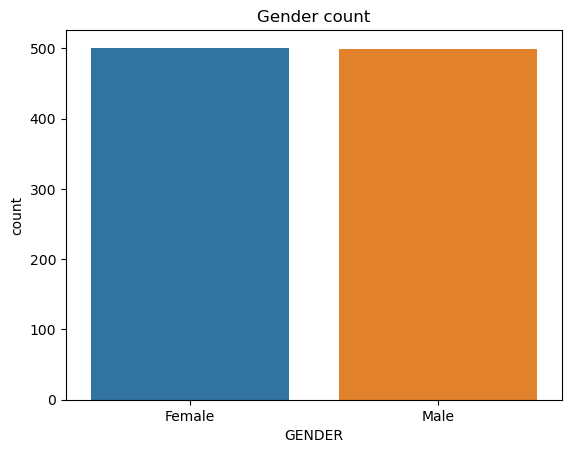

In [328]:
sns.countplot(data=sales, x="GENDER").set_title("Gender count")

In [329]:
sales["DATE"] = pd.to_datetime(sales["DATE"])

In [330]:
sales['TIME'] = pd.to_datetime(sales['TIME'])

In [331]:
sales['DAY'] = (sales['DATE']).dt.day
sales['MONTH'] = (sales['DATE']).dt.month
sales['YEAR'] = (sales['DATE']).dt.year
sales['HOUR'] = (sales['TIME']).dt.hour

Text(0.5, 1.0, 'Product Sales per Month')

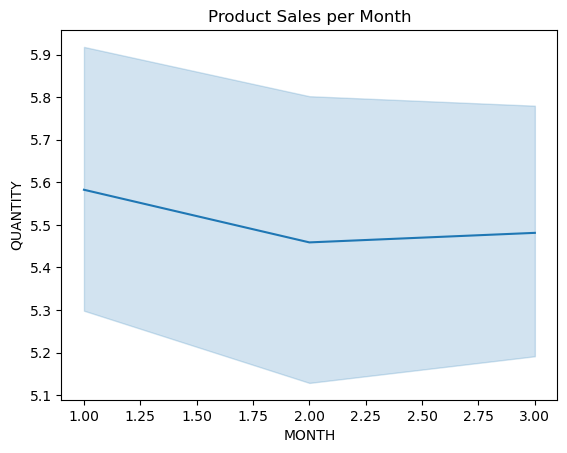

In [332]:
sns.lineplot(x="MONTH", y="QUANTITY", data=sales).set_title("Product Sales per Month")

Text(0.5, 1.0, 'Product Sales per Day')

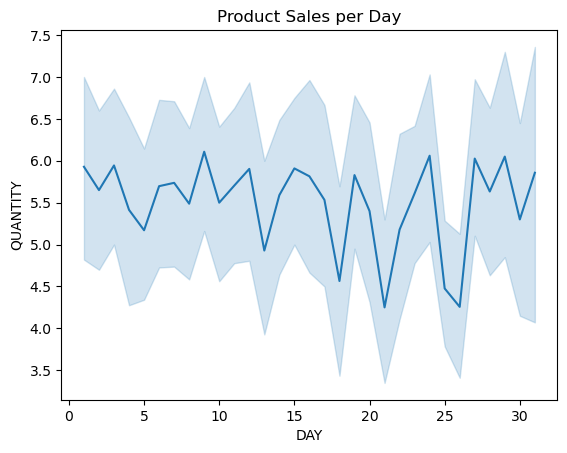

In [333]:
sns.lineplot(x="DAY", y="QUANTITY", data=sales).set_title("Product Sales per Day")

<Axes: xlabel='RATING', ylabel='PRODUCT_LINE'>

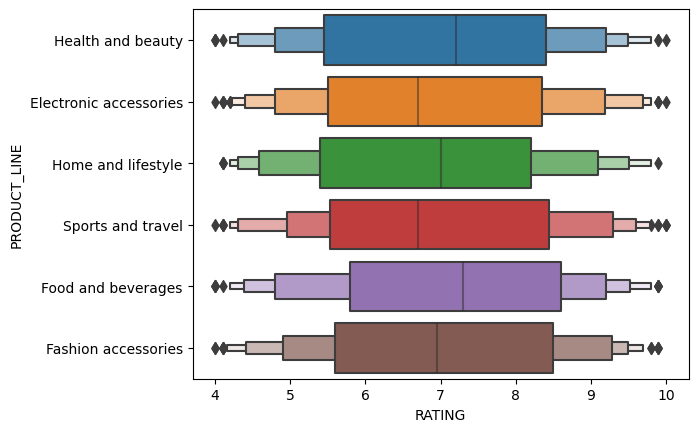

In [334]:
sns.boxenplot(y = 'PRODUCT_LINE', x = 'RATING', data=sales )

In [335]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INVOICE_ID               1000 non-null   object        
 1   BRANCH                   1000 non-null   object        
 2   CITY                     1000 non-null   object        
 3   CUSTOMER_TYPE            1000 non-null   object        
 4   GENDER                   1000 non-null   object        
 5   PRODUCT_LINE             1000 non-null   object        
 6   UNIT_PRICE               1000 non-null   float64       
 7   QUANTITY                 1000 non-null   int64         
 8   TAX_5%                   1000 non-null   float64       
 9   TOTAL                    1000 non-null   float64       
 10  DATE                     1000 non-null   datetime64[ns]
 11  TIME                     1000 non-null   datetime64[ns]
 12  PAYMENT                  1000 non-n

In [336]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["INVOICE_ID", "TOTAL", "DATE", "TIME", "DAY", "MONTH", "YEAR", "HOUR"])
y = sales["TOTAL"]

seed = np.random.randint(0, 1000)
print(seed)

553


In [337]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 13), (300, 13))

In [338]:
X_train.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,UNIT_PRICE,QUANTITY,TAX_5%,PAYMENT,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
190,B,Mandalay,Normal,Female,Home and lifestyle,77.04,3,11.556,Credit card,231.12,4.761905,11.556,7.2
990,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.140,Credit card,282.80,4.761905,14.140,4.5
947,B,Mandalay,Member,Male,Fashion accessories,53.78,1,2.689,Ewallet,53.78,4.761905,2.689,4.7
966,A,Yangon,Normal,Female,Home and lifestyle,33.30,9,14.985,Ewallet,299.70,4.761905,14.985,7.2
56,A,Yangon,Member,Male,Home and lifestyle,44.34,2,4.434,Cash,88.68,4.761905,4.434,5.8


In [339]:
y_train.head()

190    242.676
990    296.940
947     56.469
966    314.685
56      93.114
Name: TOTAL, dtype: float64

In [340]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 190 to 842
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BRANCH                   700 non-null    object 
 1   CITY                     700 non-null    object 
 2   CUSTOMER_TYPE            700 non-null    object 
 3   GENDER                   700 non-null    object 
 4   PRODUCT_LINE             700 non-null    object 
 5   UNIT_PRICE               700 non-null    float64
 6   QUANTITY                 700 non-null    int64  
 7   TAX_5%                   700 non-null    float64
 8   PAYMENT                  700 non-null    object 
 9   COGS                     700 non-null    float64
 10  GROSS_MARGIN_PERCENTAGE  700 non-null    float64
 11  GROSS_INCOME             700 non-null    float64
 12  RATING                   700 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 76.6+ KB


In [341]:
X_train_copy.isnull().sum()

BRANCH                     0
CITY                       0
CUSTOMER_TYPE              0
GENDER                     0
PRODUCT_LINE               0
UNIT_PRICE                 0
QUANTITY                   0
TAX_5%                     0
PAYMENT                    0
COGS                       0
GROSS_MARGIN_PERCENTAGE    0
GROSS_INCOME               0
RATING                     0
dtype: int64

In [342]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
190,77.04,3,11.556,231.12,4.761905,11.556,7.2
990,56.56,5,14.140,282.80,4.761905,14.140,4.5
947,53.78,1,2.689,53.78,4.761905,2.689,4.7
966,33.30,9,14.985,299.70,4.761905,14.985,7.2
56,44.34,2,4.434,88.68,4.761905,4.434,5.8


In [343]:
num_data.describe()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,55.928129,5.622857,15.694106,313.882114,4.761905e+00,15.694106,6.986857
std,26.555861,2.954213,11.949276,238.985527,5.244000e-14,11.949276,1.734997
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.207500,3.000000,6.244125,124.882500,4.761905e+00,6.244125,5.500000
50%,56.300000,6.000000,12.180750,243.615000,4.761905e+00,12.180750,7.000000
75%,78.327500,8.000000,23.094750,461.895000,4.761905e+00,23.094750,8.500000
max,99.960000,10.000000,49.490000,989.800000,4.761905e+00,49.490000,10.000000


<Axes: ylabel='UNIT_PRICE'>

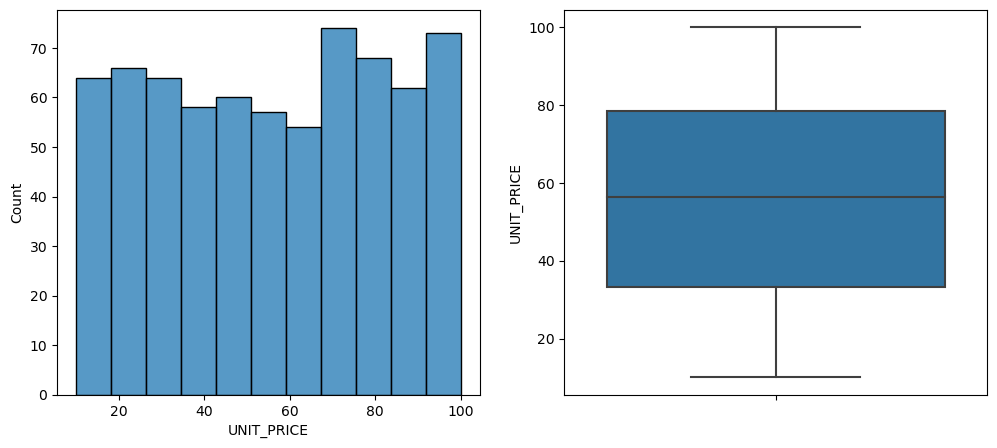

In [344]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="UNIT_PRICE", ax=ax[0])
sns.boxplot(data=X_train_copy, y="UNIT_PRICE", ax=ax[1])

In [345]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

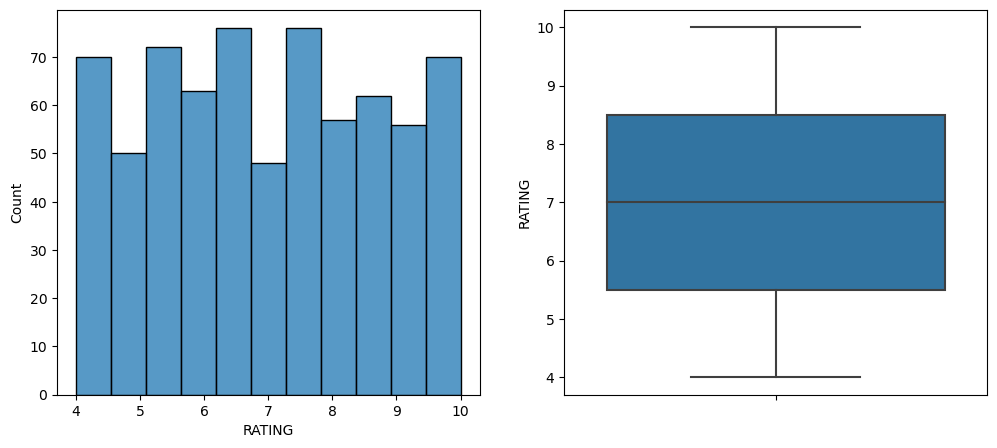

In [346]:
visualize_numeric_feature(X_train_copy, 'RATING')

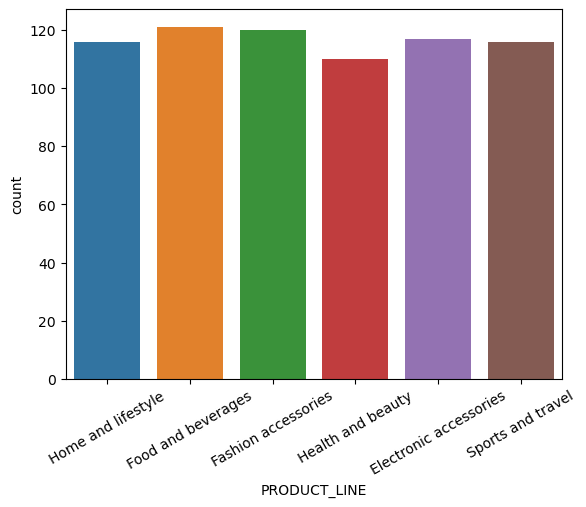

In [347]:
sns.countplot(data=X_train_copy, x="PRODUCT_LINE")
plt.xticks(rotation=30);

In [348]:
cat_feature = X_train_copy.select_dtypes(include=["object"])
cat_feature.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,PAYMENT
190,B,Mandalay,Normal,Female,Home and lifestyle,Credit card
990,A,Yangon,Normal,Female,Food and beverages,Credit card
947,B,Mandalay,Member,Male,Fashion accessories,Ewallet
966,A,Yangon,Normal,Female,Home and lifestyle,Ewallet
56,A,Yangon,Member,Male,Home and lifestyle,Cash


In [349]:
cat_feature.describe()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,PAYMENT
count,700,700,700,700,700,700
unique,3,3,2,2,6,3
top,A,Yangon,Member,Female,Food and beverages,Cash
freq,242,242,355,352,121,240


In [350]:
cat_feature.isnull().sum()

BRANCH           0
CITY             0
CUSTOMER_TYPE    0
GENDER           0
PRODUCT_LINE     0
PAYMENT          0
dtype: int64

In [351]:
pd.unique(cat_feature["PRODUCT_LINE"])

array(['Home and lifestyle', 'Food and beverages', 'Fashion accessories',
       'Health and beauty', 'Electronic accessories', 'Sports and travel'],
      dtype=object)

In [352]:
#X_train_copy['Product_line'] = X_train_copy['Product_line'].map({
#    'Electronic accessories': 'EA',
#    'Health and beauty': 'HAB',
#    'Fashion accessories': 'FA',
#    'Sports and travel': 'SAT',
#    'Food and beverages': 'FAB',
#    'Home and lifestyle': 'HAL'
#})

#pd.unique(X_train_copy['Product_line'])

In [353]:
X_train_copy.groupby(by=['CITY', 'PRODUCT_LINE']).size()

CITY       PRODUCT_LINE          
Mandalay   Electronic accessories    40
           Fashion accessories       40
           Food and beverages        27
           Health and beauty         36
           Home and lifestyle        37
           Sports and travel         46
Naypyitaw  Electronic accessories    39
           Fashion accessories       42
           Food and beverages        51
           Health and beauty         40
           Home and lifestyle        31
           Sports and travel         29
Yangon     Electronic accessories    38
           Fashion accessories       38
           Food and beverages        43
           Health and beauty         34
           Home and lifestyle        48
           Sports and travel         41
dtype: int64

In [354]:
# Handling categorical data
cat_feats = X_train.select_dtypes(include=['object'])
cat_feats.head()

,BRANCH,CITY,CUSTOMER_TYPE,GENDER,PRODUCT_LINE,PAYMENT
190,B,Mandalay,Normal,Female,Home and lifestyle,Credit card
990,A,Yangon,Normal,Female,Food and beverages,Credit card
947,B,Mandalay,Member,Male,Fashion accessories,Ewallet
966,A,Yangon,Normal,Female,Home and lifestyle,Ewallet
56,A,Yangon,Member,Male,Home and lifestyle,Cash


In [355]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [356]:
ohe_feature_name = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_name

array(['BRANCH_A', 'BRANCH_B', 'BRANCH_C', 'CITY_Mandalay',
       'CITY_Naypyitaw', 'CITY_Yangon', 'CUSTOMER_TYPE_Member',
       'CUSTOMER_TYPE_Normal', 'GENDER_Female', 'GENDER_Male',
       'PRODUCT_LINE_Electronic accessories',
       'PRODUCT_LINE_Fashion accessories',
       'PRODUCT_LINE_Food and beverages',
       'PRODUCT_LINE_Health and beauty',
       'PRODUCT_LINE_Home and lifestyle',
       'PRODUCT_LINE_Sports and travel', 'PAYMENT_Cash',
       'PAYMENT_Credit card', 'PAYMENT_Ewallet'], dtype=object)

In [357]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING
0,77.04,3,11.556,231.12,4.761905,11.556,7.2
1,56.56,5,14.140,282.80,4.761905,14.140,4.5
2,53.78,1,2.689,53.78,4.761905,2.689,4.7
3,33.30,9,14.985,299.70,4.761905,14.985,7.2
4,44.34,2,4.434,88.68,4.761905,4.434,5.8


In [358]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_name)
X_train_cat_ohe.head()

,BRANCH_A,BRANCH_B,BRANCH_C,CITY_Mandalay,CITY_Naypyitaw,CITY_Yangon,CUSTOMER_TYPE_Member,CUSTOMER_TYPE_Normal,GENDER_Female,GENDER_Male,PRODUCT_LINE_Electronic accessories,PRODUCT_LINE_Fashion accessories,PRODUCT_LINE_Food and beverages,PRODUCT_LINE_Health and beauty,PRODUCT_LINE_Home and lifestyle,PRODUCT_LINE_Sports and travel,PAYMENT_Cash,PAYMENT_Credit card,PAYMENT_Ewallet
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [359]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING,BRANCH_A,BRANCH_B,BRANCH_C,CITY_Mandalay,CITY_Naypyitaw,CITY_Yangon,CUSTOMER_TYPE_Member,CUSTOMER_TYPE_Normal,GENDER_Female,GENDER_Male,PRODUCT_LINE_Electronic accessories,PRODUCT_LINE_Fashion accessories,PRODUCT_LINE_Food and beverages,PRODUCT_LINE_Health and beauty,PRODUCT_LINE_Home and lifestyle,PRODUCT_LINE_Sports and travel,PAYMENT_Cash,PAYMENT_Credit card,PAYMENT_Ewallet
0,77.04,3,11.556,231.12,4.761905,11.556,7.2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,56.56,5,14.140,282.80,4.761905,14.140,4.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,53.78,1,2.689,53.78,4.761905,2.689,4.7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.30,9,14.985,299.70,4.761905,14.985,7.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,44.34,2,4.434,88.68,4.761905,4.434,5.8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [360]:
final_columns = X_train_final.columns.values
final_columns

array(['UNIT_PRICE', 'QUANTITY', 'TAX_5%', 'COGS',
       'GROSS_MARGIN_PERCENTAGE', 'GROSS_INCOME', 'RATING', 'BRANCH_A',
       'BRANCH_B', 'BRANCH_C', 'CITY_Mandalay', 'CITY_Naypyitaw',
       'CITY_Yangon', 'CUSTOMER_TYPE_Member', 'CUSTOMER_TYPE_Normal',
       'GENDER_Female', 'GENDER_Male',
       'PRODUCT_LINE_Electronic accessories',
       'PRODUCT_LINE_Fashion accessories',
       'PRODUCT_LINE_Food and beverages',
       'PRODUCT_LINE_Health and beauty',
       'PRODUCT_LINE_Home and lifestyle',
       'PRODUCT_LINE_Sports and travel', 'PAYMENT_Cash',
       'PAYMENT_Credit card', 'PAYMENT_Ewallet'], dtype=object)

In [361]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_name)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,UNIT_PRICE,QUANTITY,TAX_5%,COGS,GROSS_MARGIN_PERCENTAGE,GROSS_INCOME,RATING,BRANCH_A,BRANCH_B,BRANCH_C,CITY_Mandalay,CITY_Naypyitaw,CITY_Yangon,CUSTOMER_TYPE_Member,CUSTOMER_TYPE_Normal,GENDER_Female,GENDER_Male,PRODUCT_LINE_Electronic accessories,PRODUCT_LINE_Fashion accessories,PRODUCT_LINE_Food and beverages,PRODUCT_LINE_Health and beauty,PRODUCT_LINE_Home and lifestyle,PRODUCT_LINE_Sports and travel,PAYMENT_Cash,PAYMENT_Credit card,PAYMENT_Ewallet
0,26.48,3,3.972,79.44,4.761905,3.972,4.7,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,92.13,6,27.639,552.78,4.761905,27.639,8.3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,99.82,9,44.919,898.38,4.761905,44.919,6.6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12.19,8,4.876,97.52,4.761905,4.876,6.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,42.82,9,19.269,385.38,4.761905,19.269,8.9,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='TOTAL', ylabel='Count'>

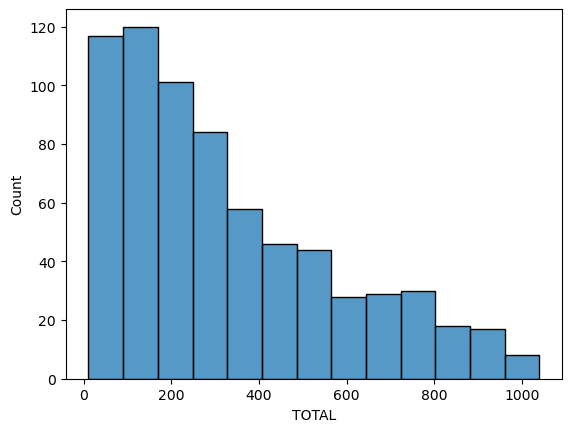

In [362]:
# Modeling

sns.histplot(y_train)

In [363]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate

In [364]:
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'), )
    print('Model', model)
    r2_scores = cv_results['test_r2']
    print("R2 CV scores:", r2_scores)
    print("R2 CV scores mean / stdev:", np.mean(r2_scores), '/', np.std(r2_scores))
    
    rmse = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse]
    print("RMSE CV scores:", rmse_scores)
    print("RMSE CV scores mean / stdev:", np.mean(rmse_scores), '/', np.std(rmse_scores))
    

In [365]:
rf = RandomForestRegressor(random_state=seed)
train_and_eval_model(model=rf, X_train=X_train_final, y_train=y_train)

Model RandomForestRegressor(random_state=553)
R2 CV scores: [0.99987487 0.9998824  0.99994111 0.9999569  0.99992693]
R2 CV scores mean / stdev: 0.999916442888147 / 3.2382040967307145e-05
RMSE CV scores: [3.0372366634961323, 2.735489028562547, 1.889105032333096, 1.6178489738604978, 1.9282640063931642]
RMSE CV scores mean / stdev: 2.2415887409290876 / 0.545611869726097


In [366]:
gb = GradientBoostingRegressor(random_state=seed)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model GradientBoostingRegressor(random_state=553)
R2 CV scores: [0.99993621 0.99991678 0.99992007 0.999924   0.99989961]
R2 CV scores mean / stdev: 0.9999193336230723 / 1.1854924294128884e-05
RMSE CV scores: [2.168639108728276, 2.3010586365157506, 2.2008353944265893, 2.1485237064492786, 2.2601997531924525]
RMSE CV scores mean / stdev: 2.215851319862469 / 0.056946551739096775


In [367]:
hgb = HistGradientBoostingRegressor(random_state=seed)
train_and_eval_model(model=hgb, X_train=X_train_final, y_train=y_train)

Model HistGradientBoostingRegressor(random_state=553)
R2 CV scores: [0.9978059  0.99877847 0.99958309 0.99963262 0.99965455]
R2 CV scores mean / stdev: 0.9990909260884837 / 0.0007214225919385184
RMSE CV scores: [12.718370717890956, 8.816056618519099, 5.026496310004308, 4.723690545645801, 4.192627883066532]
RMSE CV scores mean / stdev: 7.09544841502534 / 3.252995944005769


In [368]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=seed)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=553, ...)
R2 CV scores: [0.999709   0.9997049  0.99966546 0.99958341 0.99969125]
R2 CV scores mean / stdev: 0.9996708043309589 / 4.62739504812833e-05
RMSE CV scores: [4.6317592979432884, 4.333185755907168, 4.502654427670565, 5.030119386896148, 3.9636749304631427]


In [369]:
xgr.fit(X_train_final, y_train)
y_pred = xgr.predict(X_test_final)

R2 Score: 0.9997035903092572
RMSE Score: 4.0109249937687546


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

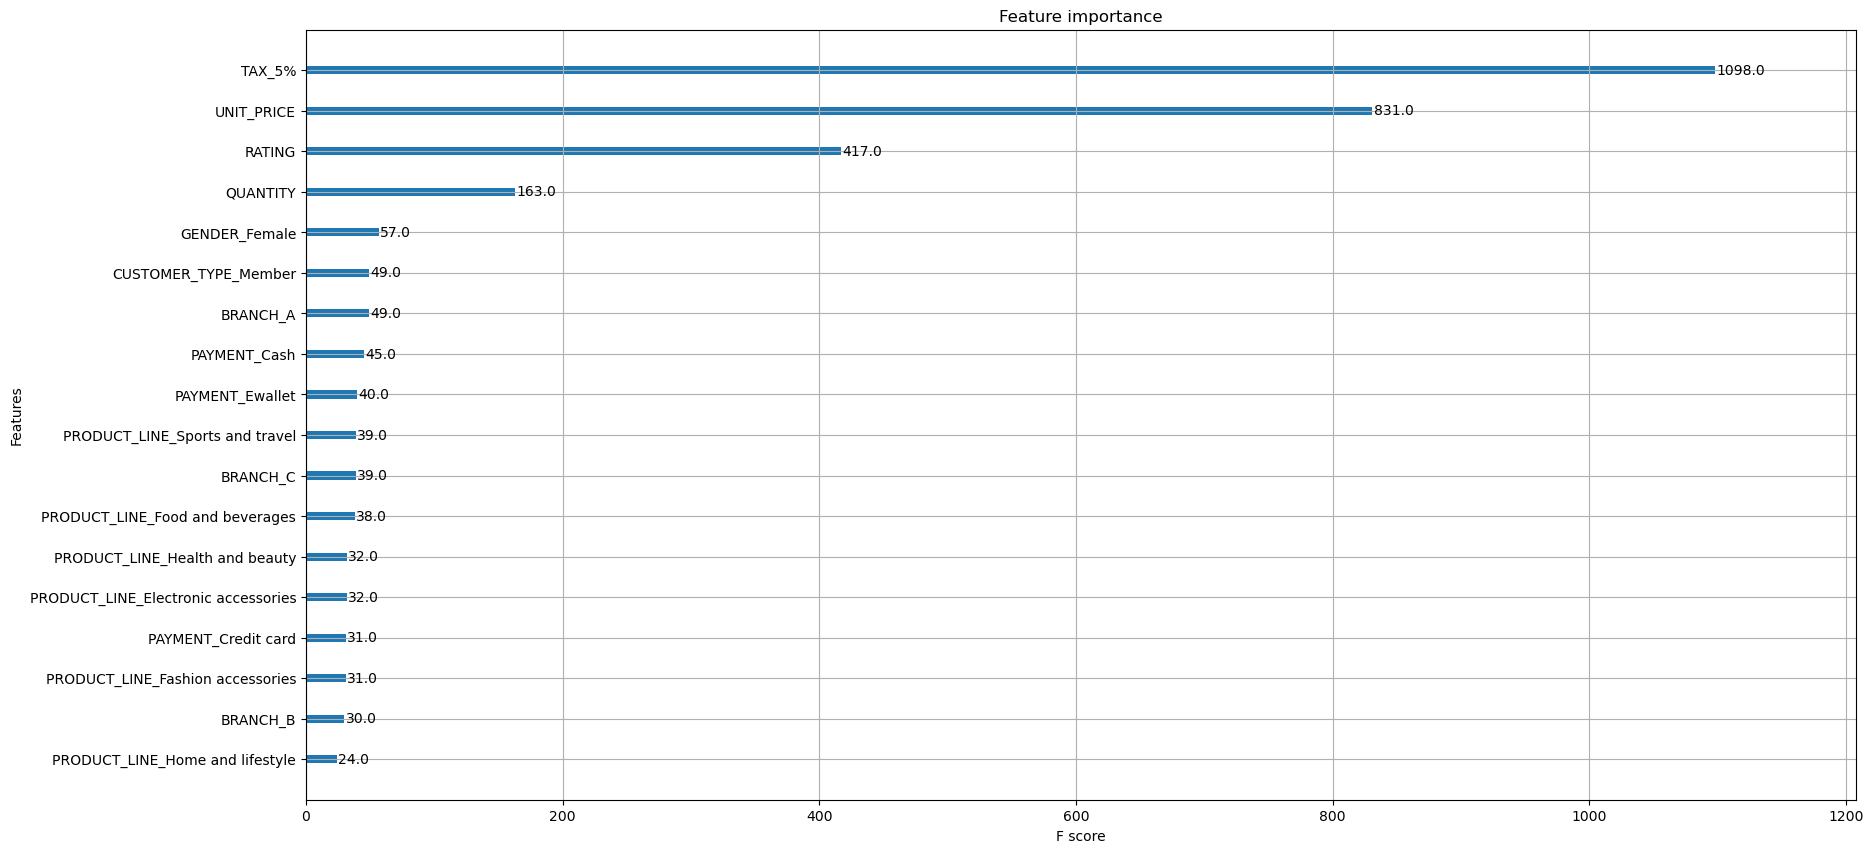

In [370]:
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import plot_importance

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE Score:", mean_squared_error(y_test, y_pred, squared=False))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_importance(xgr, ax=ax)